# Machine Learning Algorithms

## Imports

In [8]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm

from scipy.stats import multivariate_normal
from statistics import mode

import pandas as pd
from IPython.display import display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

from sklearn.datasets import load_iris

ModuleNotFoundError: No module named 'xlrd'

## General Purpose Methods

### Distance

In [2]:
class Distance:
    @staticmethod
    def squared_euclidean_distance(X,y):
        # Tile the vector y to create a matrix with the same number 
        # of rows as X and the same number of columns as y
        y = np.tile(y, (X.shape[0], 1))
        
        # Calculate the squared Euclidean distance between each row of x and y
        squared_distance = np.square(X - y).sum(axis=1)
        
        return squared_distance

    @staticmethod
    def euclidean_distance(X, y):
        squared_distance = Distance.squared_euclidean_distance(X,y)
        
        # Take the square root to get the Euclidean distance
        distance = np.sqrt(squared_distance)
    
        return distance

### Curves

In [3]:
class Curve:
    @staticmethod
    def cross_validation_cost_evolution_curve(caption, costs):
        # Select best hyperparameter
        param = np.argmin(costs) + 1

        # Plot the evolution of the validation error with respect to the best hyperparameter
        plt.plot(range(1, len(costs)+1), costs * 100, marker='o', color='crimson')
        plt.title('K-fold cross validation error evolution')
        plt.ylabel('Average Validation Error %')
        plt.xlabel(caption)
        plt.show()
        return param
    
    @staticmethod
    def accuracy_evolution_curve(caption, accuracies):
        # Select best hyperparameter
        param = np.argmax(accuracies) + 1

        # Plot the evolution of the validation error with respect to the best hyperparameter
        plt.plot(range(1, len(accuracies)+1), accuracies, marker='o', color='darkslateblue')
        plt.title('Accuracy evolution')
        plt.ylabel('Accuracy')
        plt.xlabel(caption)
        plt.show()
        return param
    
    @staticmethod
    def EM_alg_cost_evolution_curve(costs):
        total_iterations = len(costs)//2

        # Plot the evolution of the cost function
        for i in range(2*total_iterations-1):
            # Alternate the marker color for costs calculated after an expectation step (even position) 
            # or a maximization step (odd position)
            color = 'darkslateblue' if i % 2 == 0 else 'crimson'
            label='After Expectation Step' if i == 0 else 'After Maximization Step' if i == 1 else ''
            plt.plot([i, i+1], [costs[i], costs[i+1]], marker='o', mfc=color, mec=color, ms='7', ls=':', color='black', label=label)
        last_point = 2*total_iterations-1
        plt.plot(last_point, costs[last_point], marker='o', mfc='crimson', mec='crimson', ms='7')

        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.suptitle('K-means cost evolution', y=1.03)
        plt.title(r'Cost function: $\frac{1}{2}\sum_{i=1}^{N} ||\mathbf{x}_{i} - \mathbf{\hat\mu}_{\hat y_{i}}||^{2}$')
        plt.grid(True)
        plt.legend()

        iterations_ticks = [val for i in range(1, total_iterations + 1) for val in ['', i]]
        plt.xticks(range(2*total_iterations), iterations_ticks)
        
        plt.show()

        # Construct reporting table
        data = []

        for i in range(len(costs)):
            iter = str(i//2)+'a' if i%2==0 else str(i//2)+'b'  # Increasing index for every 2 rows
            step = 'E-step' if i % 2 == 0 else 'M-step'
            cost = costs[i]
            data.append({'Iteration': iter, 'Step': step, 'Cost': cost})

        cost_evolution = pd.concat([pd.DataFrame([d]) for d in data], ignore_index=True).set_index('Iteration')

        return cost_evolution
        

### Reporting Tables

In [4]:
class Report:
    @staticmethod
    def gaussian_naive_bayes_parameters(caption, priors, means, covariance_matrix, num_classes, num_features):
        
        print(caption,"- Priors")
        custom_priors_df = pd.DataFrame(priors.reshape(1, -1), columns=[f'Class_{i}' for i in range(num_classes)])
        display(custom_priors_df)

        print(caption," - Means")
        custom_means_df = pd.DataFrame(means, columns=[f'Feature_{i}' for i in range(num_features)], index=[f'Class_{i}' for i in range(num_classes)])
        display(custom_means_df)

        print(caption," - Covariance Matrix per class")
        for covariance in covariance_matrix:
            custom_covariance_df = pd.DataFrame(covariance, columns=[f'Feature_{i}' for i in range(num_features)], index=[f'Feature_{i}' for i in range(num_features)])
            display(custom_covariance_df)

## Fetch Data

### Load the User Modeling Dataset

In [11]:
user_data = pd.read_excel("../resources/user+knowledge+modeling/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls")

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

### Load Iris dataset

In [5]:
iris_data = load_iris(as_frame=True)
iris_data.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### Data Preparation

In [6]:
# split initial data into train and test (50 examples for test)
X_train, X_test, y_train, y_test = train_test_split(iris_data.data.to_numpy(), 
                                                    iris_data.target.to_numpy(), 
                                                    test_size=50, random_state=42)


# split rest of the train data into train and dev (50 examples for dev)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, 
                                                  test_size=50, random_state=42)

## KNN Classification

### Custom kNN Classifier

Below, we implement the well-known kNN algorithm. Note that the Euclidean distance is used as the distance metric for measuring the distance between test set examples and train set examples. Next, two functions are included for finding the best value for the hyperparameter ($k$):

1. Cross Validation Method (`k_fold_cross_validation`):
This method performs cross-validation to find the best value for the hyperparameter $k$. It sets the error each time as the average validation error (across all folds in which the train set is divided each time). Finally, it returns the value of $k$ that resulted in the smallest error.

2. Accuracy-based Validation Method (`accuracy_based_validation`):
This method returns the first value of $k$ that provides the best accuracy on the validation data.

In [7]:
class kNN:
    def __init__(self, k):
        # k nearest neighbours hyperparameter
        self.k = k

        # X_train: n*m matrix (n examples, m features)
        # X[i] = [xi1, xi2, ..., xim] for i=1 to n
        self.X_train = None
        
        # y_train: n*1 vector (class of each example)
        # y[i] = class of X[i]  for i=1 to n
        self.y_train = None
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        Ntest = X_test.shape[0]
        predicted_classes = list()

        for test_example_idx in range(Ntest):
            # Calculate the distance for all train examples
            d = Distance.euclidean_distance(self.X_train, X_test[test_example_idx,:])

            # Return the indices of the K closest instances
            k_closest = np.argsort(d)[:self.k]

            # Find the classes of the k closest instances
            y = self.y_train[k_closest]

            # mode: returns the most frequent (majority vote)
            predicted_classes.append(mode(y))

        return np.array(predicted_classes)

In [12]:
def k_fold_cross_validation(K, numFolds, X, y):
    """
    Perform k-fold cross-validation for kNN.

    Parameters:
    - K: Number of nearest neighbors to test.
    - numFolds: Number of folds for cross-validation.
    - X: Training data features.
    - y: Labels for the training data.

    Returns:
    - best_k: Best k value based on cross-validation.
    """

    N = X.shape[0]
    np.random.seed(10)
    perm = np.random.permutation(N)
    X = X[perm]
    y = y[perm]

    chunk_size = int(N / numFolds)
    split_indices = np.arange(chunk_size, chunk_size * numFolds, chunk_size)

    if chunk_size * numFolds < N:
        split_indices[-1] = N - 1
    else:
        last_chunk = chunk_size

    Xfolds = np.vsplit(X, split_indices)
    yfolds = np.hsplit(y, split_indices)

    errors = np.zeros((K, numFolds))

    for k in tqdm(range(1, K + 1)):
        for j in range(numFolds):
            X_train = np.vstack([Xfolds[i] for i in range(len(Xfolds)) if i != j])
            y_train = np.hstack([yfolds[i] for i in range(len(yfolds)) if i != j])
            X_test = Xfolds[j]

            knn = kNN(k)
            knn.fit(X_train, y_train)
            y_test = knn.predict(X_test)

            # Compute the percent misclassified data points
            errors[k - 1, j] = np.count_nonzero(y_test != yfolds[j]) / X_test.shape[0]
            print("kNN for k = {}, fold # {}, error = {} ".format(k, j, errors[k - 1, j]))

    val = errors.sum(axis=1) / numFolds

    best_k = Curve.cross_validation_cost_evolution_curve("k Nearest Neighbours", val)
    
    print('Smallest average error:', val[best_k - 1])
    print('Best k:', best_k)

    return best_k

In [11]:
def accuracy_based_validation(K, X_train, y_train, X_dev, y_dev):
  """
  Perform accuracy-based validation for the kNN algorithm.

  Parameters:
  - K: Number of nearest neighbors to test.
  - X_train: Training data features.
  - y_train: Labels for the training data.
  - X_dev: Development data features for validation.
  - y_dev: Labels for the development data.

  Returns:
  - best_k: The value of k that achieved the highest accuracy on the development data.
  """
    
  accuracies = np.zeros(K)

  for k in tqdm(range(1, K + 1)):
    knn = kNN(k)  # knn object with current k
    knn.fit(X_train, y_train) # fit with current k in the training data

    predictions = knn.predict(X_dev) # predict with current k using the development data
    accuracy = accuracy_score(y_dev, predictions) # count accuracy
    accuracies[k - 1] = accuracy
    
    print('Accuracy for k={0}: {1}'.format(k, accuracy))
    
  best_k = Curve.accuracy_evolution_curve("k Nearest Neighbours", accuracies)
    
  print('Best dev accuracy:', accuracies[best_k - 1])
  print('Best k:', best_k)

  return best_k

### Training & Testing

#### Optimal value of the hyperparameter $k$

Below we find the optimal value of the hyperparameter $k$ in the range [1, 10] -using both functions defined previously (`k_fold_cross_validation` and `accuracy_based_validation`)- and present our results for each value of $k$.

- `k_fold_cross_validation`

100%|██████████| 10/10 [00:00<00:00, 370.92it/s]


kNN for k = 1, fold # 0, error = 0.0 
kNN for k = 1, fold # 1, error = 0.0 
kNN for k = 1, fold # 2, error = 0.0 
kNN for k = 1, fold # 3, error = 0.2 
kNN for k = 1, fold # 4, error = 0.0 
kNN for k = 1, fold # 5, error = 0.0 
kNN for k = 1, fold # 6, error = 0.0 
kNN for k = 1, fold # 7, error = 0.0 
kNN for k = 1, fold # 8, error = 0.2 
kNN for k = 1, fold # 9, error = 0.0 
kNN for k = 2, fold # 0, error = 0.0 
kNN for k = 2, fold # 1, error = 0.0 
kNN for k = 2, fold # 2, error = 0.0 
kNN for k = 2, fold # 3, error = 0.2 
kNN for k = 2, fold # 4, error = 0.0 
kNN for k = 2, fold # 5, error = 0.0 
kNN for k = 2, fold # 6, error = 0.0 
kNN for k = 2, fold # 7, error = 0.0 
kNN for k = 2, fold # 8, error = 0.2 
kNN for k = 2, fold # 9, error = 0.0 
kNN for k = 3, fold # 0, error = 0.0 
kNN for k = 3, fold # 1, error = 0.0 
kNN for k = 3, fold # 2, error = 0.0 
kNN for k = 3, fold # 3, error = 0.2 
kNN for k = 3, fold # 4, error = 0.0 
kNN for k = 3, fold # 5, error = 0.0 
kNN for k = 

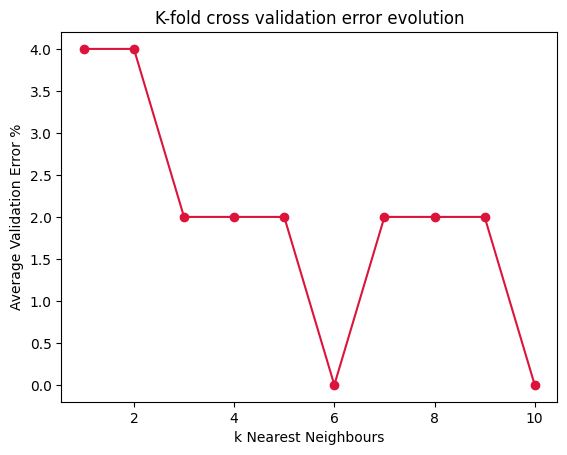

Smallest average error: 0.0
Best k: 6


In [14]:
K = 10 # Find the best k hyperparameter in range (1, K)
numFolds = 10 # Number of folds for cross validation

cross_val_best_k = k_fold_cross_validation(K, numFolds, X_train, y_train)

- `accuracy_based_validation`

100%|██████████| 10/10 [00:00<00:00, 393.48it/s]


Accuracy for k=1: 0.9
Accuracy for k=2: 0.9
Accuracy for k=3: 0.88
Accuracy for k=4: 0.88
Accuracy for k=5: 0.88
Accuracy for k=6: 0.9
Accuracy for k=7: 0.86
Accuracy for k=8: 0.86
Accuracy for k=9: 0.86
Accuracy for k=10: 0.86


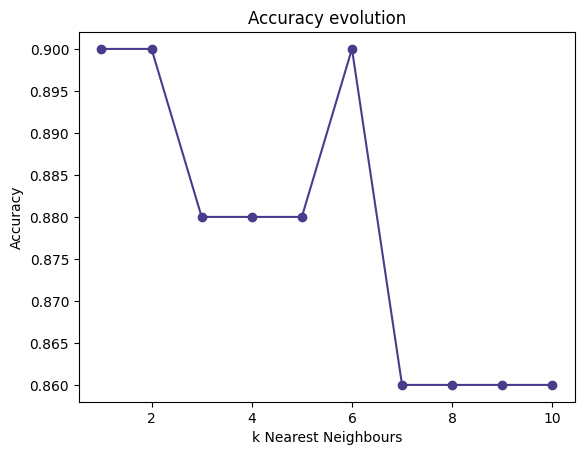

Best dev accuracy: 0.9
Best k: 1


In [15]:
K = 10
acc_based_best_k = accuracy_based_validation(K, X_train, y_train, X_dev, y_dev)

#### Custom kNN Classifier

- Using the `k_fold_cross_validation` result as $k$


First, the values of the accuracy, precision, recall and f1-score metrics are presented for the train set. We anticipate the scores to equal 1.0 for the train set: 

In [25]:
best_k = cross_val_best_k

# Training kNN Classifier
knn_custom = kNN(best_k) 
knn_custom.fit(X_train, y_train)

# Using kNN Classifier (train set)
y_custom = knn_custom.predict(X_train)
print(classification_report(y_train, y_custom))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        19

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



Now, the values of the same metrics are presented for the test set. We anticipate lower values for the respective metrics than those calculated for the train set:

In [24]:
# Using kNN Classifier (test set)
y_custom = knn_custom.predict(X_test)
print(classification_report(y_test, y_custom))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



- Using the `accuracy_based_validation` result as $k$

We repeat the process for both the train set and the test set:

In [28]:
best_k = acc_based_best_k

# Training kNN Classifier
knn_custom = kNN(best_k) 
knn_custom.fit(X_train, y_train)

# Using kNN Classifier (train set)
y_custom = knn_custom.predict(X_train)
print(classification_report(y_train, y_custom))

# Using kNN Classifier (test set)
y_custom = knn_custom.predict(X_test)
print(classification_report(y_test, y_custom))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        19

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



We can observe that the result of `k_fold_cross_validation` performs better on the test set (while on the train set both results yield maximum scores, as expected).

#### Scikit-Learn kNN Classifier

As implied by the last observation, the result of `k_fold_cross_validation` performs better and hence we will use it to train the Scikit-Learn's algorithm.

First, the values of the accuracy, precision, recall and f1-score metrics are presented for the train set:

In [34]:
best_k = cross_val_best_k

# Training kNN Classifier
knn_scikit = KNeighborsClassifier(n_neighbors=best_k) 
knn_scikit.fit(X_train, y_train)

# Using kNN Classifier (train set)
y_scikit = knn_scikit.predict(X_train)
print(classification_report(y_train, y_scikit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        19

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



Now, the values of the same metrics are presented for the test set. We anticipate lower values for the respective metrics than those calculated for the train set:

In [35]:
# Using kNN Classifier (test set)
y_scikit = knn_scikit.predict(X_test)
print(classification_report(y_test, y_scikit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



####  Observations

TEXT HERE

## K-means Clustering

### Custom k-means

In [317]:
class kMeans:
    def __init__(self, k, max_iters):
        # k = number of clusters
        self.k = k
        # define the maximum number of iterations
        self.max_iters = max_iters
        # the centroids for all labels
        self.centroids = None

    @staticmethod
    def cost_function(X, c, labels): 
        return 0.5*sum(Distance.squared_euclidean_distance(X[i].reshape((1,X[i].shape[0])), c[labels[i]]) for i in range(X.shape[0]))
    
    def fit(self, X):
        # Choose k random points of data as centroids
        indices = np.random.choice(X.shape[0], self.k, replace=False)
        self.centroids = X[indices]

        costs = list()

        for iter in range(self.max_iters):
            # Expectation step
            labels = self.predict(X)  # Assign each data point to the nearest centroid
            costs.append(self.cost_function(X, self.centroids, labels).item()) # Calculate the cost 

            # Maximization step
            new_centroids = np.array([np.mean(X[labels == label], axis=0) for label in range(self.k)])
            costs.append(self.cost_function(X, new_centroids, labels).item()) # Calculate the new cost
            
            # If the algorithm has converged, then stop
            if np.all(self.centroids == new_centroids):
                break
                
            self.centroids = new_centroids

        iters = len(costs)//2
        return costs, iters

    def predict(self, X):
        # Assign each data point to the nearest centroid 
        distances = np.array([Distance.squared_euclidean_distance(self.centroids, x) for x in X])
        labels = np.argmin(distances, axis=1)

        return labels


### Training & Testing

💡We will use the KMeans algorithm to cluster the observations of the training set (X_train), as clustering is commonly performed for grouping existing observations rather than predicting the cluster to which a new observation would belong. 

❗For evaluating the algorithm's performance, it is crucial to note that the cluster labels assigned by KMeans may not necessarily align with the true class labels. Therefore, other evaluation metrics should be employed, that take into account whether observations that normally belong to the same class are indeed found in the same cluster.

✔️We are going to use 3 commonly used clustering performance evaluation metrics (given that the ground truth is known):
1. <b>Adjusted Rand Index</b>: It is a function that measures the similarity of the two assignments, ignoring permutations:
    - $ARI = (RI - Expected_{RI}) / (max(RI) - Expected_{RI})$ <br> where $RI$ = (number of agreeing pairs) / (number of pairs)
    - The score range is [-1, 1]. Lower values indicate different labelings, similar clusterings have a high index and 1 is the perfect match score.

<br>
    
2. <b>Adjusted Mutual Information</b>: It is a function that measures the agreement of the two assignments, ignoring permutations. Two different normalized versions of this measure are available, Normalized Mutual Information (NMI) and Adjusted Mutual Information (AMI). NMI is often used in the literature, while AMI was proposed more recently and is normalized against chance. We will use AMI.
    - Values close to 0 indicate two label assignments that are largely independent, while values close to 1 indicate significant agreement. Further, an AMI of exactly 1 indicates that the two label assignments are equal (with or without permutation).

<br>

3. <b>Fowlkes-Mallows Index</b>: It is defined as the geometric mean of the pairwise precision and recall:
    - $FMI = \frac{TP}{\sqrt{(TP+FP)(TP+FN)}}$
    - The score ranges from 0 to 1. A high value indicates a good similarity between two clusters.

[Clustering performance evaluation](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)

#### Custom k-means

In [318]:
num_of_classes = len(np.unique(y_train))
max_iters = 100

# Training k-means
k_means_custom = kMeans(num_of_classes, max_iters) 
costs, iters = k_means_custom.fit(X_train)

# Using k-means 
y_custom = k_means_custom.predict(X_train)

# Evaluation of clustering performance using appropriate metrics
ari = metrics.adjusted_rand_score(y_train, y_custom)
ami = metrics.adjusted_mutual_info_score(y_train, y_custom)
fm = metrics.fowlkes_mallows_score(y_train, y_custom)

print("Adjusted Rand Index (ARI): ", ari)
print("Adjusted Mutual Information (AMI): ", ami)
print("Fowlkes-Mallows Index (FM): ", fm)

Adjusted Rand Index (ARI):  0.7360751198434404
Adjusted Mutual Information (AMI):  0.7783243538894051
Fowlkes-Mallows Index (FM):  0.8244785330650813


In [319]:
# Results
print("Iterations run: ", iters)
print("Final Cost: ", costs[-1])
print("Centroids: \n", k_means_custom.centroids)

Iterations run:  6
Final Cost:  13.715240950226248
Centroids: 
 [[5.78235294 2.65882353 4.37647059 1.47647059]
 [6.76153846 3.09230769 5.79230769 2.06923077]
 [5.005      3.41       1.445      0.245     ]]


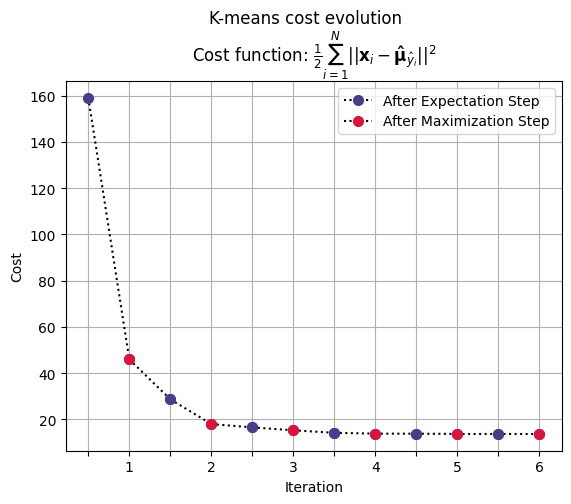

,Step,Cost
Iteration,,
0a,E-step,159.050
0b,M-step,45.942
1a,E-step,28.705
1b,M-step,17.982
2a,E-step,16.536
2b,M-step,15.285
3a,E-step,14.192
3b,M-step,13.843
4a,E-step,13.810


In [322]:
# The evolution of the cost function
report_cost_evolution = Curve.EM_alg_cost_evolution_curve(costs)
display(report_cost_evolution)

#### Scikit-learn k-means

In [320]:
# Training k-means
k_means_scikit = KMeans(n_clusters=num_of_classes, init="random")
k_means_scikit.fit(X_train)

# Using k-means
y_scikit = k_means_scikit.predict(X_train)

# Evaluate clustering performance using appropriate metrics
ari = metrics.adjusted_rand_score(y_train, y_scikit)
ami = metrics.adjusted_mutual_info_score(y_train, y_scikit)
fm = metrics.fowlkes_mallows_score(y_train, y_scikit)

print("Adjusted Rand Index (ARI): ", ari)
print("Adjusted Mutual Information (AMI): ", ami)
print("Fowlkes-Mallows Index (FM): ", fm)

Adjusted Rand Index (ARI):  0.7360751198434404
Adjusted Mutual Information (AMI):  0.7783243538894051
Fowlkes-Mallows Index (FM):  0.8244785330650813


c:\Users\alvio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [321]:
# Results
print("Iterations run: ", k_means_scikit.n_iter_)
print("Final Cost: ", 1/2 * k_means_scikit.inertia_)    # inertia does not include an 1/2 factor as we did in our implementation, so we need to multiply it to be able to compare the 2 costs
print("Centroids: \n", k_means_scikit.cluster_centers_)

Iterations run:  9
Final Cost:  13.715240950226244
Centroids: 
 [[5.005      3.41       1.445      0.245     ]
 [5.78235294 2.65882353 4.37647059 1.47647059]
 [6.76153846 3.09230769 5.79230769 2.06923077]]


### Observations

TEXT

## Principal Component Analysis

### With SVD & Classic PCA

In [244]:
class PCA:
    def __init__(self, m):
        self.m = m

    def svd_reduction(self, X):
        U, S, V = np.linalg.svd(X, full_matrices=False)
        print( "U", U.shape, "S", S.shape, "V", V.shape )
        mu = X.mean(axis=0)

        eigvecs = V[:self.m,:]
        eigvals = S[:self.m]
        print( 'X', X.shape, 'eigvecs', eigvecs.shape, 'eigvals', eigvals.shape )
        Z = (X-mu).dot(eigvecs.T)
        print( 'Z', Z.shape )
        return Z, eigvecs, eigvals, mu
    
    def classic_reduction(self, X):
        mu = X.mean(axis=0).reshape( (1,-1) )

        normalized_X = X-mu

        S = (1/X.shape[0]) * normalized_X.T.dot( normalized_X )

        eigvectors, eigvals = self.eigsort( S )

        U = eigvectors[:,:self.m]
        Lambdas = eigvals[:self.m]
        print( X.shape, U.shape, Lambdas.shape )

        Z = normalized_X.dot(U)
        return Z, U, Lambdas, mu
    
    def eigsort(self, A):
        eigvals, U = np.linalg.eig(A)
        # sort eigenvalues in descending order
        order = np.argsort(eigvals)[::-1]
        eigvals = eigvals[order]
        #re-arrange the eigenvectors
        U = U[:,order]
        return U, eigvals

In [245]:
m = 3

iris_data = load_iris(as_frame=True)
iris_data.frame

# split initial data into train and test (50 examples for test)
X_train, X_test, y_train, y_test = train_test_split(iris_data.data.to_numpy(), 
                                                    iris_data.target.to_numpy(), 
                                                    test_size=50)


# split rest of the train data into train and dev (50 examples for dev)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, 
                                                  test_size=50)

pca = PCA(m)
z, eva, eve, mu = pca.svd_reduction(X_train)
print(z.shape)

U (50, 4) S (4,) V (4, 4)
X (50, 4) eigvecs (3, 4) eigvals (3,)
Z (50, 3)
(50, 3)


In [246]:
z, u, eva, mu = pca.classic_reduction(X_train)
print(z.shape)

(50, 4) (4, 3) (3,)
(50, 3)


## Least Squares Classification

Consider a classification problem with  classes, with a 1-of-K binary coding scheme for the target vector t. Each class $C_k$ has its own linear model.

Each class $C_k$ is described by its own linear model so that: $y_k(\mathbf{x})=\mathbf{w}_k^T \mathbf{x} + w_{k0}$ where k=1,...,K, or, using vector notation: $$\mathbf{ y(x) = {\tilde W}^T \tilde x }$$

where $\mathbf{\tilde W}$ is a matrix whose $k^{th}$ column comprises the $D+1$-dimensional vector $ \mathbf {\tilde w}_k = (w_{k0} ; \mathbf{w}_k^T)^T$ and $ \mathbf {\tilde x}$ is the corresponding augmented input vector $(1;\mathbf{x}^T)^T$ with a dummy input $x_0 = 1$. Assign new input $\mathbf x$ to the class $C_k$ if $k=argmax\;y_j (\mathbf x)$. Consider a training data set $\{\mathbf {x}_n, \mathbf {t}_n \}$ where $n=1,...,N$ and define a matrix $\mathbf T$ whose $n^{th}$ row is the vector $\mathbf{t}_n^T$.

The sum-of-squares error function can then be written as:
$E_D(\mathbf{\tilde W}) = \frac{1}{2}Tr((\mathbf{\tilde{X} \tilde{W} - T})^T(\mathbf{\tilde{X} \tilde{W} - T}))$.

➡️  Setting the derrivative wrt $\tilde W$ to zero, and rearranging, we obtain the solution:
$\mathbf {\tilde{W} = (\tilde{X}^T\tilde{X})^{-1}\tilde{X}^TT}$, where $(\tilde{X}^T\tilde{X})^{-1}\tilde{X}^T$ is the pseudo-inverse of $\mathbf{\tilde X}.$

➡️  We then obtain the discriminant function in the form $\mathbf{ y(x) = {\tilde W}^T \tilde x }$ 

<i>Bishop, C. M. (2006). Pattern Recognition and Machine Learning (Chapter 4.1.3: Least Squares for Classification).</i>


- To implement the algorithm described above, during fit we first covert `y_train` to one-hot-vectors (matrix $\mathbf T$) and then learn the weights (matrix $\mathbf W$) using the above formula. Predict is implemented exactly as derscibed.

### Custom Least Squares Classifier

In [156]:
class LeastSquares:

    def __init__(self):
        self.W = None
        self.num_classes = None    
        
    def _one_hot_vector(self, x):
        vector = np.zeros(self.num_classes).astype(int)
        vector[x] = 1
        return vector
        
    def fit(self, X_train, y_train):
        self.num_classes = np.unique(y_train).shape[0]
        
        # Insert 1 as the first column in X to augment the input vectors with a dummy input x_0 = 1
        X = np.insert(X_train, 0, 1, axis=1)
        
        # T: T[i] = one-hot vector for the class of example i
        T = list(map(self._one_hot_vector, y_train))
        
        # W: W = pseudo_inverse(X) * T
        self.W = np.linalg.pinv(X).dot(T)

    def predict(self, X_test):
        # Insert 1 as the first column in X to augment the input vectors with a dummy input x_0 = 1
        X = np.insert(X_test, 0, 1, axis=1)
        
        # Y: Y = transpose(W) * transpose(X)
        Y = self.W.T.dot(X.T)

        classes = np.argmax(Y, axis=0)
        
        return classes

### Training & Testing

#### Custom Least Squares Classifier

First, the values of the accuracy, precision, recall and f1-score metrics are presented for the train set:

In [177]:
# Training Least Squares Classifier
least_squares = LeastSquares()
least_squares.fit(X_train, y_train)

# Using Least Squares Classifier (train set)
y_custom = least_squares.predict(X_train)
print(classification_report(y_train, y_custom))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.71      0.45      0.56        11
           2       0.74      0.89      0.81        19

    accuracy                           0.84        50
   macro avg       0.82      0.78      0.79        50
weighted avg       0.84      0.84      0.83        50



Now, the values of the same metrics are presented for the test set. We anticipate lower values for the respective metrics than those calculated for the train set:

In [179]:
# Using Least Squares Classifier (test set)
y_custom = least_squares.predict(X_test)
print(classification_report(y_test, y_custom))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.33      0.50        15
           2       0.62      1.00      0.76        16

    accuracy                           0.80        50
   macro avg       0.87      0.78      0.75        50
weighted avg       0.88      0.80      0.77        50



The weights learned during training (matrix $\mathbf W$) are displayed below:

In [155]:
# Print the weights that were learned during the training
print("Weights learned: \n",least_squares.W)

Weights learned: 
 [[ 0.20670856  1.39324362 -0.59995218]
 [ 0.04454683 -0.03654124 -0.00800559]
 [ 0.24956203 -0.37230851  0.12274649]
 [-0.22091457  0.1878363   0.03307826]
 [-0.03456185 -0.43165908  0.46622093]]


#### Scikit-Learn Ridge Classifier

First, the values of the accuracy, precision, recall and f1-score metrics are presented for the train set:

In [194]:
# Training Ridge Classifier
scikit_ridge = RidgeClassifier(alpha=0) # alpha=0 means no regularization
scikit_ridge.fit(X_train, y_train)

# Using Ridge Classifier (train set)
y_scikit = scikit_ridge.predict(X_train)
print(classification_report(y_train, y_scikit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.71      0.45      0.56        11
           2       0.74      0.89      0.81        19

    accuracy                           0.84        50
   macro avg       0.82      0.78      0.79        50
weighted avg       0.84      0.84      0.83        50



Now, the values of the same metrics are presented for the test set. We anticipate lower values for the respective metrics than those calculated for the train set:

In [199]:
# Using Ridge Classifier (test set)
y_scikit = scikit_ridge.predict(X_test)
print(classification_report(y_test, y_scikit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.33      0.50        15
           2       0.62      1.00      0.76        16

    accuracy                           0.80        50
   macro avg       0.87      0.78      0.75        50
weighted avg       0.88      0.80      0.77        50



The weights learned during training are displayed below:

In [198]:
# Print the weights that were learned during the training
print("Weights learned: \n",scikit_ridge.coef_)

Weights learned: 
 [[ 0.08909365  0.49912405 -0.44182913 -0.06912371]
 [-0.07308247 -0.74461703  0.37567261 -0.86331815]
 [-0.01601118  0.24549297  0.06615653  0.93244186]]


### Observations

TEXT

## Logistic Regression using Stochastic Gradient Descent


In this section, the Logistic Regression classification algorithm is implemented. Our model is trained using the Stochastic Gradient Descent algorithm, and the Cross-Entropy Loss is used as the loss function.

The weight update rule given that the loss function is Cross Entropy Loss, is the following:

$$weight = weight - \eta * gradient$$
where:
- $\eta$: learning rate
- $gradient=outer(example,\; probabilities−one\; hot\; label)$

---

Let's break down the maths behind the weight update rule:

1. <b>The cross-entropy loss for a single training example is given by:</b>
    $$L(\hat y, y) = - \sum_i{y_i}log(\hat y_i)$$
    where:
    - $\hat y_i$: the predicted probability for class $i$ (through $softmax$)
    - $y_i$: the corresponding element of the one-hot encoded true label vector

2. <b>The softmax activation function is used to convert raw scores (logits) into probabilities:</b>
    $$softmax(\mathbf t)_j = \frac{exp(\mathbf t_j)}{\sum_{k=1}^K{exp(\mathbf t_k)}}$$
    where:
    - $\mathbf t$: the vector of logits
    - $K$: the number of classes

3. <b> The gradient of Cross-Entropy Loss w.r.t. the weights is:</b>
    $$ \frac{\partial L}{\partial \mathbf W_{ij}} = x_i(\hat y_j - y_j)$$
    Explanation: 

### Custom Logistic Regression Classifier

In [109]:
class LogisticRegression():
    def __init__(self, n_iters, learning_rate, regularizator):
        self.n_iters = n_iters
        self.learning_rate = learning_rate
        self.regularizator = regularizator
        self.W = None
    
    @staticmethod
    def softmax(t):
        return np.exp(t) / np.sum(np.exp(t))  

    def fit(self, X_train, y_train):
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

        num_examples, num_features = X_train.shape
        num_classes = len(np.unique(y_train))

        # insert 1 as the first column in X to augment the input vectors with a dummy input x_0 = 1
        X = np.insert(X_train, 0, 1, axis=1) 

        # insert y_train array to shuffle examples in for loop
        F = np.insert(X, 0, y_train, axis=1)     

        # initialize the weights W
        self.W = np.zeros((num_features + 1, num_classes))

        best_accuracy = 0
        best_epoch = 0
        n_epochs_unchanged = 0

        for epoch in range(1, self.n_iters+1):
            np.random.shuffle(F)                    #random permutation of examples
            X = F[:,1:]
            y_train = F[:,0]
            for i in range(num_examples):
                example = X[i]  
                logits = self.W.T.dot(example)  # (D,K)-->(K,D) *   (D,) 
                probabilities = self.softmax(logits)
                one_hot_vector = np.zeros(num_classes)
                one_hot_vector[int(y_train[i])] = 1

                # weight_modification = self.learning_rate * np.outer(example, probabilities - one_hot_vector)
                # self.W = (1 - 2 * self.regularizator * self.learning_rate) * self.W - weight_modification

                self.W = self.W - self.learning_rate * np.outer(example, probabilities - one_hot_vector)
                # (D,K)                                  (D,K)     #(D,)       (K,)         (K,)

            # Early Stopping
            accuracy = accuracy_score(y_val, self.predict(X_val))
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_epoch = epoch
                best_weights = self.W
                n_epochs_unchanged = 0
            else:
                n_epochs_unchanged += 1

            if n_epochs_unchanged == 20:
                self.W = best_weights
                break  

        print("Best epoch: "+str(best_epoch))


    def predict(self, X_test):
        X = np.insert(X_test, 0, 1, axis=1)   #insert 1 in x_vector for w0

        y_pred = list()
        for example in X:
            y_pred.append(np.argmax(self.softmax(self.W.T.dot(example))))

        return np.array(y_pred)


### Training & Testing

#### Custom Logistic Regression Classifier

In [110]:
# Training Logistic Regression Classifier
logistic_regression = LogisticRegression(100, 0.01, 0)
logistic_regression.fit(X_train, y_train)

# Using Logistic Regression Classifier
y_custom = logistic_regression.predict(X_test)
print(classification_report(y_test, y_custom))

ValueError: operands could not be broadcast together with shapes (3,4) (4,3) (3,4) 

#### Scikit-Learn Logistic Regression Classifier

In [97]:
# Training SGD Classifier
scikit_sgd = SGDClassifier(loss="log_loss", max_iter=100, early_stopping=True, learning_rate='optimal', eta0=0.01, alpha=0.0001) #loss='log_loss', max_iter=100, early_stopping=True
scikit_sgd.fit(X_train, y_train)

# Using SGD Classifier
y_scikit = scikit_sgd.predict(X_test)
print(classification_report(y_test, y_scikit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.68      1.00      0.81        15
           2       1.00      0.56      0.72        16

    accuracy                           0.86        50
   macro avg       0.89      0.85      0.84        50
weighted avg       0.90      0.86      0.85        50



### Observations

TEXT

## Gaussian Naive Bayes Classifier

### Custom Gaussian Naive Bayes Classifier

Consider a general case where we are in $R^d$. We assume that the population from which our data is sampled follows a normal distribution $N(μ, Σ)$. To apply Naive Bayes in $R^d$, we choose to approximate this distribution with a second distribution $N(m, C)$, where $C$ is a diagonal covariance matrix. The latter implies that we consider independence among the variables, leading to zero covariances (and thus a diagonal covariance matrix $C$ where only $COV(X_i, X_i) = VAR(X_i) \geq 0$, for $i=1,...,d)$.

Let $θ = (μ, Σ)$ and $φ = (m, C)$.

Now, we can approach the distribution $N(μ, Σ)$ in two ways:
1. Choose $φ$ s.t. $KL(θ : φ)$ is minimized
2. Choose $φ$ s.t. $KL(φ : θ)$ is minimized, where KL is the Kullback-Liebler divergence

These approaches lead to the following formulas, respectively:
1. $m = μ$, $C = diag(Σ)$
2. $m = μ$, $C = diag(Λ)^{-1}$, where $Λ$ is the precision matrix (i.e. $Λ = Σ^{-1}$)

In the following implementation we use the first formula.

In [105]:
class GaussianNaiveBayes:
    def __init__(self):
        self.classes = None
        self.priors = None
        self.means = None
        self.covariances = None
    
    def fit(self, X_train, y_train):
        self.classes = np.unique(y_train)
        self.priors = {}
        self.means = {}
        self.covariances = {}
        
        for c in self.classes:
            # Separate examples per class 
            class_data = X_train[y_train == c]
            
            # Calculate the prior probability for each class
            self.priors[c] = class_data.shape[0] / X_train.shape[0]

            # Calculate the mean vector for each class: m = [mean(f1), mean(f2),...]
            self.means[c] = np.mean(class_data, axis=0)
            
            # Calculate the covariance vector for each class: C = diag(var(f1), var(f2),...). Note that only the diagonal needs to be stored
            self.covariances[c] = np.var(class_data, axis=0)

    def predict(self, X_test):
        predictions = list()

        for example in X_test:
            class_prob = []
            for c in self.classes:
                # P(c|example) ~ P(c) * P(example|c) = P(c) * P(example|m_c, C_c)
                class_prob.append(self.priors[c] * multivariate_normal.pdf(example, mean = self.means[c], cov=self.covariances[c]))
            predictions.append(self.classes[np.argmax(class_prob)])
        
        return np.array(predictions)

### Training & Testing

#### Custom Gaussian Naive Bayes Classifier

First, the values of the accuracy, precision, recall and f1-score metrics are presented for the train set:

In [97]:
# Training Gaussian Naive Bayes Classifier
gaussian_nb = GaussianNaiveBayes()
gaussian_nb.fit(X_train, y_train)

# Using Gaussian Naive Bayes Classifier (train set)
y_custom = gaussian_nb.predict(X_train)
print(classification_report(y_train, y_custom))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.92      1.00      0.96        11
           2       1.00      0.95      0.97        19

    accuracy                           0.98        50
   macro avg       0.97      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



Now, the values of the same metrics are presented for the test set. We anticipate lower values for the respective metrics than those calculated for the train set:

In [98]:
# Using Gaussian Naive Bayes Classifier (test set)
y_custom = gaussian_nb.predict(X_test)
print(classification_report(y_test, y_custom))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.73      0.85        15
           2       0.80      1.00      0.89        16

    accuracy                           0.92        50
   macro avg       0.93      0.91      0.91        50
weighted avg       0.94      0.92      0.92        50



The parameters (priors, means and covariance matrix) are displayed below:

In [74]:
# Print the estimated priors (per class), means (per class and feature) and covariances(per class and feature)
custom_priors = np.asarray(list(gaussian_nb.priors.values()))
custom_means = np.asarray(list(gaussian_nb.means.values()))
custom_num_classes = len(gaussian_nb.classes)
custom_covariances = np.array([np.diag(list(gaussian_nb.covariances.values())[i]) for i in range(custom_num_classes)])

Report.gaussian_naive_bayes_parameters("Custom Gaussian Naive Bayes Classifier", custom_priors, custom_means, custom_covariances, custom_num_classes, X_train.shape[1])

Custom Gaussian Naive Bayes Classifier - Priors


,Class_0,Class_1,Class_2
0,0.4,0.22,0.38


Custom Gaussian Naive Bayes Classifier  - Means


,Feature_0,Feature_1,Feature_2,Feature_3
Class_0,5.005,3.410,1.445,0.245
Class_1,5.745,2.673,4.045,1.227
Class_2,6.474,2.947,5.537,2.026


Custom Gaussian Naive Bayes Classifier  - Covariance Matrix per class


,Feature_0,Feature_1,Feature_2,Feature_3
Feature_0,0.123,0.000,0.000,0.000
Feature_1,0.000,0.176,0.000,0.000
Feature_2,0.000,0.000,0.026,0.000
Feature_3,0.000,0.000,0.000,0.011


,Feature_0,Feature_1,Feature_2,Feature_3
Feature_0,0.23,0.000,0.000,0.000
Feature_1,0.00,0.071,0.000,0.000
Feature_2,0.00,0.000,0.222,0.000
Feature_3,0.00,0.000,0.000,0.037


,Feature_0,Feature_1,Feature_2,Feature_3
Feature_0,0.375,0.000,0.000,0.000
Feature_1,0.000,0.117,0.000,0.000
Feature_2,0.000,0.000,0.277,0.000
Feature_3,0.000,0.000,0.000,0.082


#### Scikit-Learn Gaussian Naive Bayes Classifier

First, the values of the accuracy, precision, recall and f1-score metrics are presented for the train set:

In [99]:
# Training GaussianNB Classifier
scikit_gaussian_nb = GaussianNB()
scikit_gaussian_nb.fit(X_train, y_train)

# Using GaussianNB Classifier (train set)
y_scikit = scikit_gaussian_nb.predict(X_train)
print(classification_report(y_train, y_scikit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.92      1.00      0.96        11
           2       1.00      0.95      0.97        19

    accuracy                           0.98        50
   macro avg       0.97      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



Now, the values of the same metrics are presented for the test set. We anticipate lower values for the respective metrics than those calculated for the train set:

In [100]:
# Using GaussianNB Classifier (test set)
y_scikit = scikit_gaussian_nb.predict(X_test)
print(classification_report(y_test, y_scikit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.73      0.85        15
           2       0.80      1.00      0.89        16

    accuracy                           0.92        50
   macro avg       0.93      0.91      0.91        50
weighted avg       0.94      0.92      0.92        50



The parameters (priors, means and covariance matrix) are displayed below:

In [76]:
# Print the estimated priors (per class), means (per class and feature) and covariances(per class and feature)
scikit_priors = scikit_gaussian_nb.class_prior_
scikit_means = scikit_gaussian_nb.theta_
scikit_num_classes = len(scikit_gaussian_nb.classes_)
scikit_covariances = np.array([np.diag(scikit_gaussian_nb.var_[i]) for i in range(scikit_num_classes)])
scikit_num_features = scikit_gaussian_nb.n_features_in_

Report.gaussian_naive_bayes_parameters("Scikit-Learn Gaussian Naive Bayes Classifier", scikit_priors, scikit_means, scikit_covariances, scikit_num_classes, scikit_num_features)


Scikit-Learn Gaussian Naive Bayes Classifier - Priors


,Class_0,Class_1,Class_2
0,0.4,0.22,0.38


Scikit-Learn Gaussian Naive Bayes Classifier  - Means


,Feature_0,Feature_1,Feature_2,Feature_3
Class_0,5.005,3.410,1.445,0.245
Class_1,5.745,2.673,4.045,1.227
Class_2,6.474,2.947,5.537,2.026


Scikit-Learn Gaussian Naive Bayes Classifier  - Covariance Matrix per class


,Feature_0,Feature_1,Feature_2,Feature_3
Feature_0,0.123,0.000,0.000,0.000
Feature_1,0.000,0.176,0.000,0.000
Feature_2,0.000,0.000,0.026,0.000
Feature_3,0.000,0.000,0.000,0.011


,Feature_0,Feature_1,Feature_2,Feature_3
Feature_0,0.23,0.000,0.000,0.000
Feature_1,0.00,0.071,0.000,0.000
Feature_2,0.00,0.000,0.222,0.000
Feature_3,0.00,0.000,0.000,0.037


,Feature_0,Feature_1,Feature_2,Feature_3
Feature_0,0.375,0.000,0.000,0.000
Feature_1,0.000,0.117,0.000,0.000
Feature_2,0.000,0.000,0.277,0.000
Feature_3,0.000,0.000,0.000,0.082


### Observations

TEXT HERE